### 2.3.2策略迭代法和价值迭代法
2.2节中使用的是随机迭代。让智能体学习向目标前进的方式主要有两种方式：策略迭代，更快到达目标的策略所执行的动作最重要；价值迭代：从目标反向计算在目标前一步、前两步的位置，一步一步引导智能体，给状态也附加价值（优先级）

本节中对参数到策略的转换函数进行修改，用softmax函数
$$P(\theta_i)=\frac{\exp (\beta\theta_i)}{\sum_{j=1}^{N_a} \exp (\beta\theta_i)}$$
其中，$\beta$是反温度，反温度越小，行为越随机。

使用softmax函数，因为即使参数$\theta$是负数也可以求出策略，指数函数只输出正值。

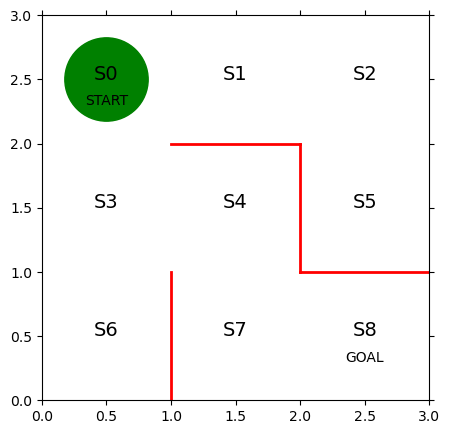

In [74]:
#导入所使用的包
import numpy as np
import pylab as plt
%matplotlib inline

# 迷宫的初始位置

#声明图的大小以及图的变量名
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

#画出红色的墙壁
plt.plot([1,1],[0,1],color='red',linewidth=2)
plt.plot([1,2],[2,2],color='red',linewidth=2)
plt.plot([2,2],[2,1],color='red',linewidth=2)
plt.plot([2,3],[1,1],color='red',linewidth=2)

#画出表示状态的文字S0-S8
plt.text(0.5,2.5,'S0',size=14,ha='center')
plt.text(1.5,2.5,'S1',size=14,ha='center')
plt.text(2.5,2.5,'S2',size=14,ha='center')
plt.text(0.5,1.5,'S3',size=14,ha='center')
plt.text(1.5,1.5,'S4',size=14,ha='center')
plt.text(2.5,1.5,'S5',size=14,ha='center')
plt.text(0.5,0.5,'S6',size=14,ha='center')
plt.text(1.5,0.5,'S7',size=14,ha='center')

plt.text(2.5,0.5,'S8',size=14,ha='center')
plt.text(0.5,2.3,'START',ha='center')
plt.text(2.5,0.3,'GOAL',ha='center')

#设定画图的范围
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both',which='both',bottom='off',top='off',
                labelbottom='off',right='off',left='off',labelleft='off')

#当前位置S0用绿色圆圈画出
line, = ax.plot([0.5],[2.5],marker="o",color='g',markersize=60)
plt.savefig('./image/迷宫任务图.png',dpi = 600)
#设定参数θ的初始值theta_0，用于确定初始方案
 
#行为状态0~7,列用↑、→、↓、←表示移动的方向
theta_0 = np.array([[np.nan,1,1,np.nan],     #S0
                    [np.nan,1,np.nan,1],     #S1
                    [np.nan,np.nan,1,1],     #S2
                    [1,1,1,np.nan],     #S3
                    [np.nan,np.nan,1,1],     #S4
                    [1,np.nan,np.nan,np.nan],#S5
                    [1,np.nan,np.nan,np.nan],#S6
                    [1,1,np.nan,np.nan],     #S7
                    ])     #S8是目标，无策略

In [75]:
# 策略参数theta根据softmax函数转换为行为策略Π的定义

def softmax_convert_into_pi_from_theta(theta):

    beta = 0.1
    [m,n] = theta.shape #获取θ矩阵的大小
    pi = np.zeros((m,n))
    exp_theta = np.exp(beta*theta) #θ转换为指数形式
    for i in range(m):
        pi[i,:]=exp_theta[i,:]/np.nansum(exp_theta[i,:])
    pi = np.nan_to_num(pi) #将nan转为0
    return pi

In [76]:
# 求解初始策略
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(f'初始策略：\n{pi_0}')

初始策略：
[[0.    0.5   0.5   0.   ]
 [0.    0.5   0.    0.5  ]
 [0.    0.    0.5   0.5  ]
 [0.333 0.333 0.333 0.   ]
 [0.    0.    0.5   0.5  ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.5   0.5   0.    0.   ]]


In [77]:
# 定义求取动作a以及1步后移动的状态s
def get_action_and_next_s(pi,s):
    direction = ['up','right','down','left']

    next_direction = np.random.choice(direction,p=pi[s,:])
    if next_direction == 'up':
        action = 0
        s_next = s - 3 #向上移动状态数字减3
    elif next_direction == 'right':
        action = 1
        s_next = s + 1 #向→移动状态数字+1
    elif next_direction == 'down':
        action = 2
        s_next = s + 3 #向下移动状态数字+3
    elif next_direction == 'left':
        action = 3
        s_next = s - 1 #向左移动状态数字-1
    return [action,s_next]

In [78]:
#迷宫内使智能体移动后到目标的函数的定义

def goal_maze_ret_s_a(pi):
    s = 0#开始地点
    s_a_history = [[0,np.nan]] #记录智能体移动列表

    while(1):
        [action,next_s] = get_action_and_next_s(pi,s)
        s_a_history[-1][1] = action #带入当前状态，最后一个状态的动作
        s_a_history.append([next_s,np.nan])

        if next_s == 8:
            break
        else:
            s = next_s

    return s_a_history

s_a_history = goal_maze_ret_s_a(pi_0)
print(f'状态轨迹：{s_a_history}')
print(f'所需要的步数：{len(s_a_history)-1}')

状态轨迹：[[0, 2], [3, 1], [4, 3], [3, 2], [6, 0], [3, 1], [4, 2], [7, 0], [4, 2], [7, 1], [8, nan]]
所需要的步数：10


### 2.3.3根据策略梯度法更新策略
$$\theta_{s_j,a_j}=\theta_{s_j,a_j}+\eta\cdot\Delta\theta_{s,a_j}$$
$$\Delta\theta_{s,a_j}={N(s_j,a_j)-P(s_j,a_j)N(s_j,a)}/T $$
其中$\theta_{s_j,a_j}$是一个参数，用于确定在状态sj下采取aj的概率。$\eta$是学习速率，如果太小，学习就很慢，太大就无法正常学习，$N(s_j,a_j)$是状态$s_j$下采取动作$a_j$的次数，$N(s_j,a)$是状态$s_j$下采取的动作总数，$T$是实现目标所采取的总步数。

In [79]:
# 定义theta的更新函数

def update_theta(theta,pi,s_a_history):
    eta = 0.1
    T = len(s_a_history)-1 #到达目标的总步数

    [m,n] = theta.shape    #theta矩阵的大小
    delta_theta = theta.copy()  #生成初始的delta_theta,由于指针原因不能直接使用delta_theta = theta

    #求取delta_theta的各个元素
    for i in range(0,m):
        for j in range(0,n):
            if not(np.isnan(theta[i,j])):   #theta不是nan时
                
                SA_i = [SA for SA in s_a_history if SA[0] == i] #列表中取出状态i
                SA_ij = [SA for SA in s_a_history if SA == [i,j]]#取出状态i对应的动作j

                N_i = len(SA_i) #状态i下的动作的总次数
                N_ij = len(SA_ij)
                delta_theta[i,j] = (N_ij - pi[i,j]*N_i)/T

    new_theta = theta + eta * delta_theta
    return new_theta

#策略更新
new_theta = update_theta(theta_0,pi_0,s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(f'策略是：{pi}')
    

策略是：[[0.    0.5   0.5   0.   ]
 [0.    0.5   0.    0.5  ]
 [0.    0.    0.5   0.5  ]
 [0.333 0.334 0.333 0.   ]
 [0.    0.    0.5   0.5  ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.5   0.5   0.    0.   ]]


In [80]:
# 策略梯度法求解迷宫问题

stop_epsilon = 1e-4 #策略的变化小于10^-4则结束学习
theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta,pi,s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)

    print(np.sum(np.abs(new_pi - pi)))
    print(f'求解迷宫问题所需要的步数为：{len(s_a_history)-1}')

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi


0.0007407493028164236
求解迷宫问题所需要的步数为：36
0.0032409443819550465
求解迷宫问题所需要的步数为：6
0.0006954391364248358
求解迷宫问题所需要的步数为：108
0.0015277532454171516
求解迷宫问题所需要的步数为：16
0.0010118635083288252
求解迷宫问题所需要的步数为：72
0.0007258225203760627
求解迷宫问题所需要的步数为：56
0.0032404320398099484
求解迷宫问题所需要的步数为：6
0.001938366703376937
求解迷宫问题所需要的步数为：70
0.003380880760659899
求解迷宫问题所需要的步数为：12
0.0008125168132502303
求解迷宫问题所需要的步数为：90
0.0006993904891222091
求解迷宫问题所需要的步数为：138
0.0013257365218438677
求解迷宫问题所需要的步数为：60
0.0016158631886310504
求解迷宫问题所需要的步数为：12
0.0009410465230587084
求解迷宫问题所需要的步数为：76
0.0006384970690965219
求解迷宫问题所需要的步数为：110
0.002636594674432613
求解迷宫问题所需要的步数为：12
0.0032339177358171045
求解迷宫问题所需要的步数为：6
0.0005348255289995274
求解迷宫问题所需要的步数为：68
0.0018551704049664108
求解迷宫问题所需要的步数为：18
0.0014941903534745893
求解迷宫问题所需要的步数为：28
0.0006874513378277713
求解迷宫问题所需要的步数为：92
0.0020360596807303954
求解迷宫问题所需要的步数为：12
0.0008361043247522293
求解迷宫问题所需要的步数为：108
0.001255388054575035
求解迷宫问题所需要的步数为：32
0.0005414396973849045
求解迷宫问题所需要的步数为：46
0.0008905748980311823
求解迷宫问题

0.0007664186891672697
求解迷宫问题所需要的步数为：70
0.0018729817129633508
求解迷宫问题所需要的步数为：14
0.0015639150671655222
求解迷宫问题所需要的步数为：16
0.0011957583053449072
求解迷宫问题所需要的步数为：40
0.003048944071683435
求解迷宫问题所需要的步数为：6
0.0011334442179022353
求解迷宫问题所需要的步数为：26
0.003069399310934695
求解迷宫问题所需要的步数为：10
0.0030457650063451247
求解迷宫问题所需要的步数为：6
0.0006777497216040596
求解迷宫问题所需要的步数为：120
0.0013338358786380011
求解迷宫问题所需要的步数为：42
0.0030411218015637953
求解迷宫问题所需要的步数为：6
0.0010871490100737846
求解迷宫问题所需要的步数为：158
0.0015083982879933733
求解迷宫问题所需要的步数为：12
0.0027573887887771265
求解迷宫问题所需要的步数为：10
0.004339195619271208
求解迷宫问题所需要的步数为：4
0.0008400577746672799
求解迷宫问题所需要的步数为：32
0.003327685788072965
求解迷宫问题所需要的步数为：12
0.002205697226923431
求解迷宫问题所需要的步数为：18
0.0013861626163306773
求解迷宫问题所需要的步数为：24
0.0034852788826147396
求解迷宫问题所需要的步数为：8
0.0035367513286376218
求解迷宫问题所需要的步数为：6
0.002220790718709842
求解迷宫问题所需要的步数为：14
0.0012127449906093046
求解迷宫问题所需要的步数为：22
0.001580185095945874
求解迷宫问题所需要的步数为：16
0.001331558693858037
求解迷宫问题所需要的步数为：16
0.0007418077777117116
求解迷宫问题所需要的步数为：4

In [81]:

#确认最终策略
np.set_printoptions(precision=3,suppress=True)
print(pi)


[[0.    0.044 0.956 0.   ]
 [0.    0.309 0.    0.691]
 [0.    0.    0.439 0.561]
 [0.034 0.925 0.04  0.   ]
 [0.    0.    0.956 0.044]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.051 0.949 0.    0.   ]]


In [82]:
#智能体的移动可视化
from matplotlib import animation
from IPython.display import HTML

def init():
    '''初始化背景图像'''
    line.set_data([],[])
    return (line,)

def animate(i):
    '''每一帧画面内容'''
    state = s_a_history[i][0]  #画出当前位置
    x = (state % 3) + 0.5     #x的坐标
    y = 2.5 - int(state/3)
    line.set_data(x,y)
    return (line,)

#初始化函数和绘图函数生成动画
anim = animation.FuncAnimation(fig,animate,init_func=init,frames=len(s_a_history),
                               interval = 200,repeat=False)
HTML(anim.to_jshtml())

C:\Users\xulon\AppData\Local\Temp\ipykernel_23916\4036831212.py:15: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x,y)
